In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle 
import sys
import seaborn as sb
import math
from numpy import random
from scipy.signal import find_peaks
from scipy.optimize import minimize
from matplotlib.ticker import LinearLocator
from numpy import linalg as LA
sys.path.append(r'C:\Users\Joar\Documents\1_Education\NTNU\OneDrive - NTNU\Thesis\Modelling\FD Model')

In [22]:
from OptimizationProblem_headangle import OptimizationProblem
from FloaterParameters import FloaterParameters
from Environment import Environment
from Buoy import Buoy
from Mass import Mass
from Density import Density
from Area import Area
from GlobalCoordinateSystem import GlobalCoordinateSystem
from SystemMatrices import MatrixCalculation
from plot_hydroD_results import plot_hydroD_results

In [3]:
plt.rcParams['axes.grid'] = True
plt.rcParams["figure.figsize"] = (15, 5)
plt.rcParams.update({'font.size': 15})
plt.rcParams['font.family'] = 'serif' 

In [4]:
styles = ['-','--',':',':*']

# Interpolation

Adding y spacing and draft to optimization

In [5]:
from HydroDInterpolation import Interpolate2d, LinearInterpolate, Interpolate4d

In [6]:
x_space = 55
y_space = 55
dia_column = 12.5
draft = 13

In [7]:
design = [55, 55, 12.5, 13.5]

In [8]:
interp_inputs = np.array([[40,60,12,14],
                         [60,60,12,14],
                         [50,60,12,14]])

In [9]:
# Finding the nearest HydroD simulations for surrogate model
interp_inputs = np.array(
    [[np.floor(x_space / 10) * 10, np.floor(y_space / 10) * 10, np.floor(dia_column), np.floor(draft / 2) * 2],
     [np.ceil(x_space / 10) * 10, np.floor(y_space / 10) * 10, np.floor(dia_column), np.floor(draft / 2) * 2],
     [np.floor(x_space / 10) * 10, np.ceil(y_space / 10) * 10, np.floor(dia_column), np.floor(draft / 2) * 2],
     [np.ceil(x_space / 10) * 10, np.ceil(y_space / 10) * 10, np.floor(dia_column), np.floor(draft / 2) * 2],
     [np.floor(x_space / 10) * 10, np.floor(y_space / 10) * 10, np.ceil(dia_column), np.floor(draft / 2) * 2],
     [np.ceil(x_space / 10) * 10, np.floor(y_space / 10) * 10, np.ceil(dia_column), np.floor(draft / 2) * 2],
     [np.floor(x_space / 10) * 10, np.ceil(y_space / 10) * 10, np.ceil(dia_column), np.floor(draft / 2) * 2],
     [np.ceil(x_space / 10) * 10, np.ceil(y_space / 10) * 10, np.ceil(dia_column), np.floor(draft / 2) * 2],
     [np.floor(x_space / 10) * 10, np.floor(y_space / 10) * 10, np.floor(dia_column), np.ceil(draft / 2) * 2],
     [np.ceil(x_space / 10) * 10, np.floor(y_space / 10) * 10, np.floor(dia_column), np.ceil(draft / 2) * 2],
     [np.floor(x_space / 10) * 10, np.ceil(y_space / 10) * 10, np.floor(dia_column), np.ceil(draft / 2) * 2],
     [np.ceil(x_space / 10) * 10, np.ceil(y_space / 10) * 10, np.floor(dia_column), np.ceil(draft / 2) * 2],
     [np.floor(x_space / 10) * 10, np.floor(y_space / 10) * 10, np.ceil(dia_column), np.ceil(draft / 2) * 2],
     [np.ceil(x_space / 10) * 10, np.floor(y_space / 10) * 10, np.ceil(dia_column), np.ceil(draft / 2) * 2],
     [np.floor(x_space / 10) * 10, np.ceil(y_space / 10) * 10, np.ceil(dia_column), np.ceil(draft / 2) * 2],
     [np.ceil(x_space / 10) * 10, np.ceil(y_space / 10) * 10, np.ceil(dia_column), np.ceil(draft / 2) * 2]])
# Interpolating surrogate models to get estimate
design = [x_space, y_space, dia_column, draft]
results = []

for i in np.linspace(0, len(interp_inputs[:, 1]) - 1, len(interp_inputs)).astype(int):
    file_loc = r'E:\pickle_files'
    file_name = "\sim_x_%d_y_%d_D%d_dr%d" % (
        interp_inputs[i, 0], interp_inputs[i, 1], interp_inputs[i, 2], interp_inputs[i, 3])
    file_path = file_loc + file_name
    infile = open(file_path, 'rb')
    results.append(pickle.load(infile))
    infile.close()


In [10]:
sim = Interpolate4d(results, interp_inputs, design)

In [11]:
file_loc = r'C:\Users\Joar\Documents\1_Education\NTNU\pickle_files'
file_name = r"\sim_x_55.00_y_55.00_D12.50_dr13.50"
file_path = file_loc + file_name
infile = open(file_path, 'rb')
sim = pickle.load(infile)
infile.close()
mufp = FloaterParameters(55, 55, 12.5, 13.5)
env = Environment()


For first draft, interpolating x, y, and then diameter

In [23]:
mufp = FloaterParameters(55, 55, 12.5, 13.5)
env = Environment()

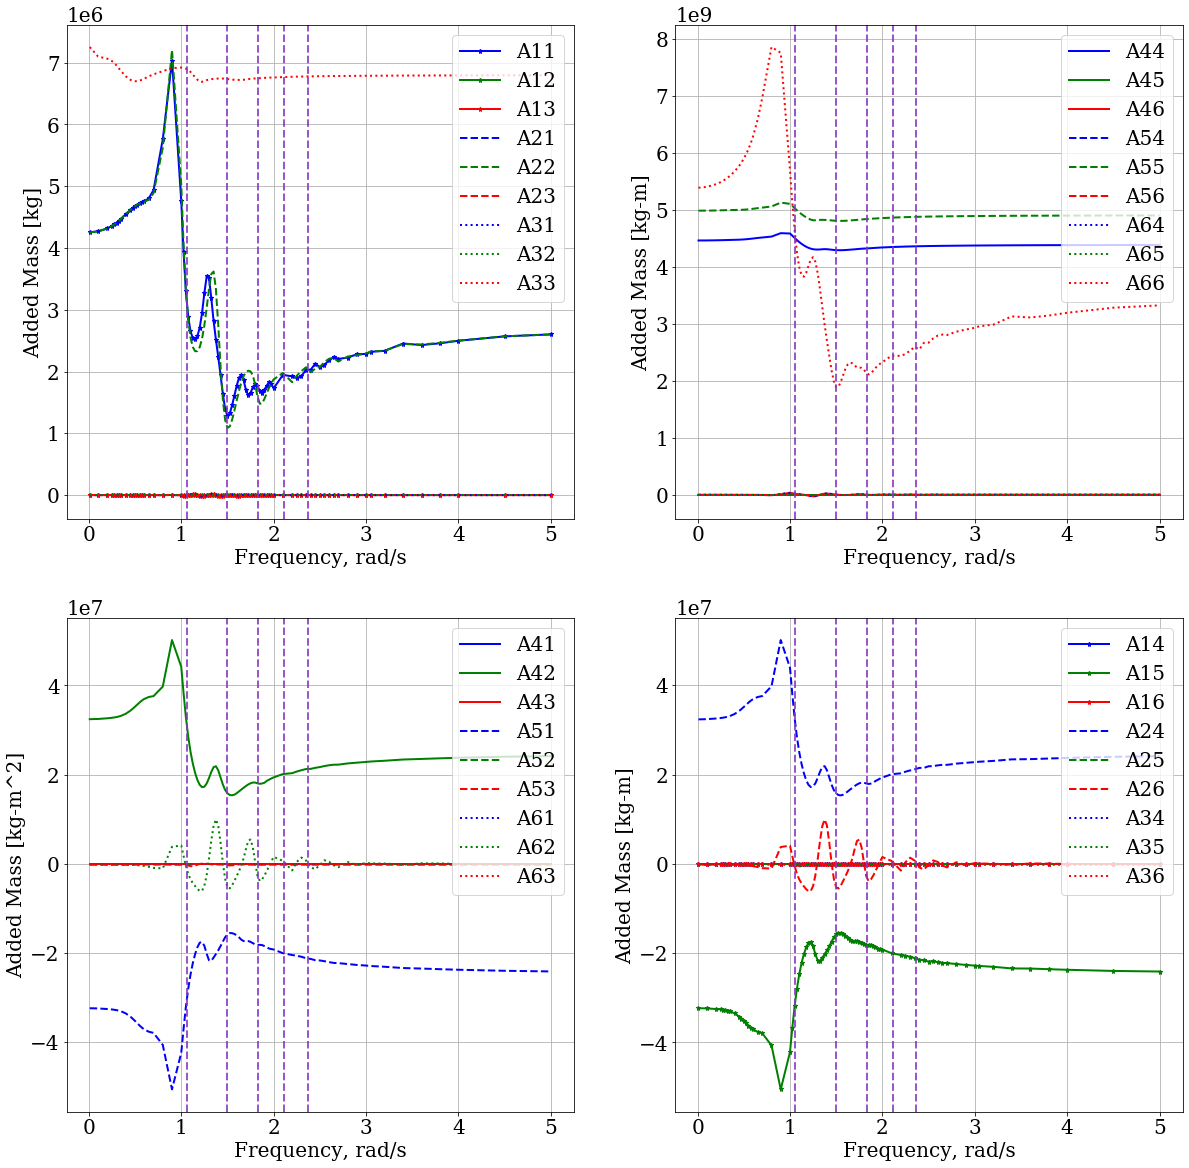

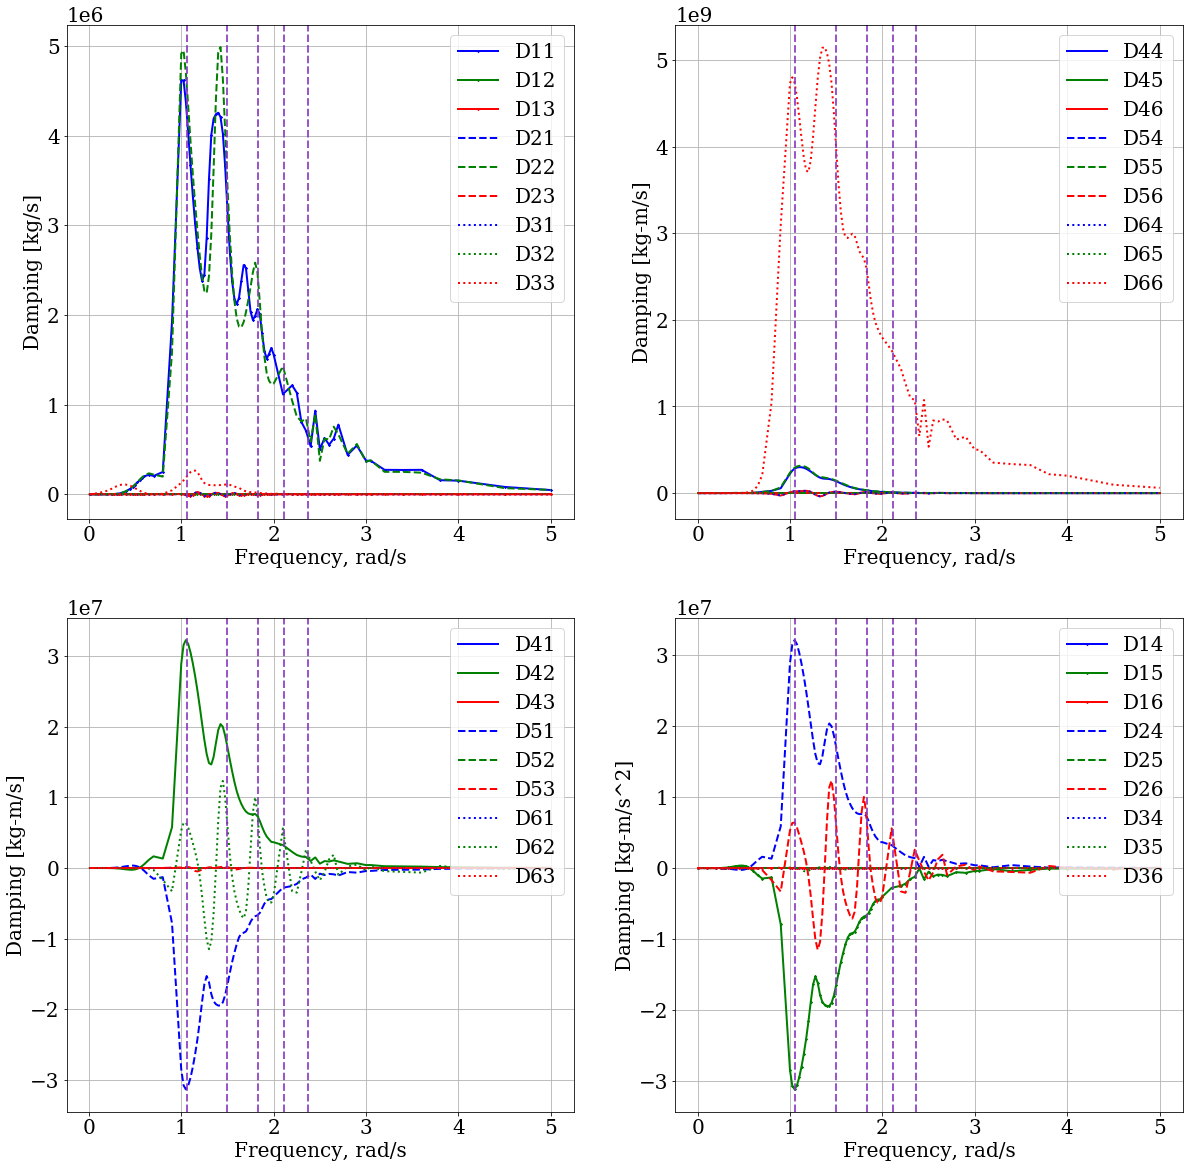

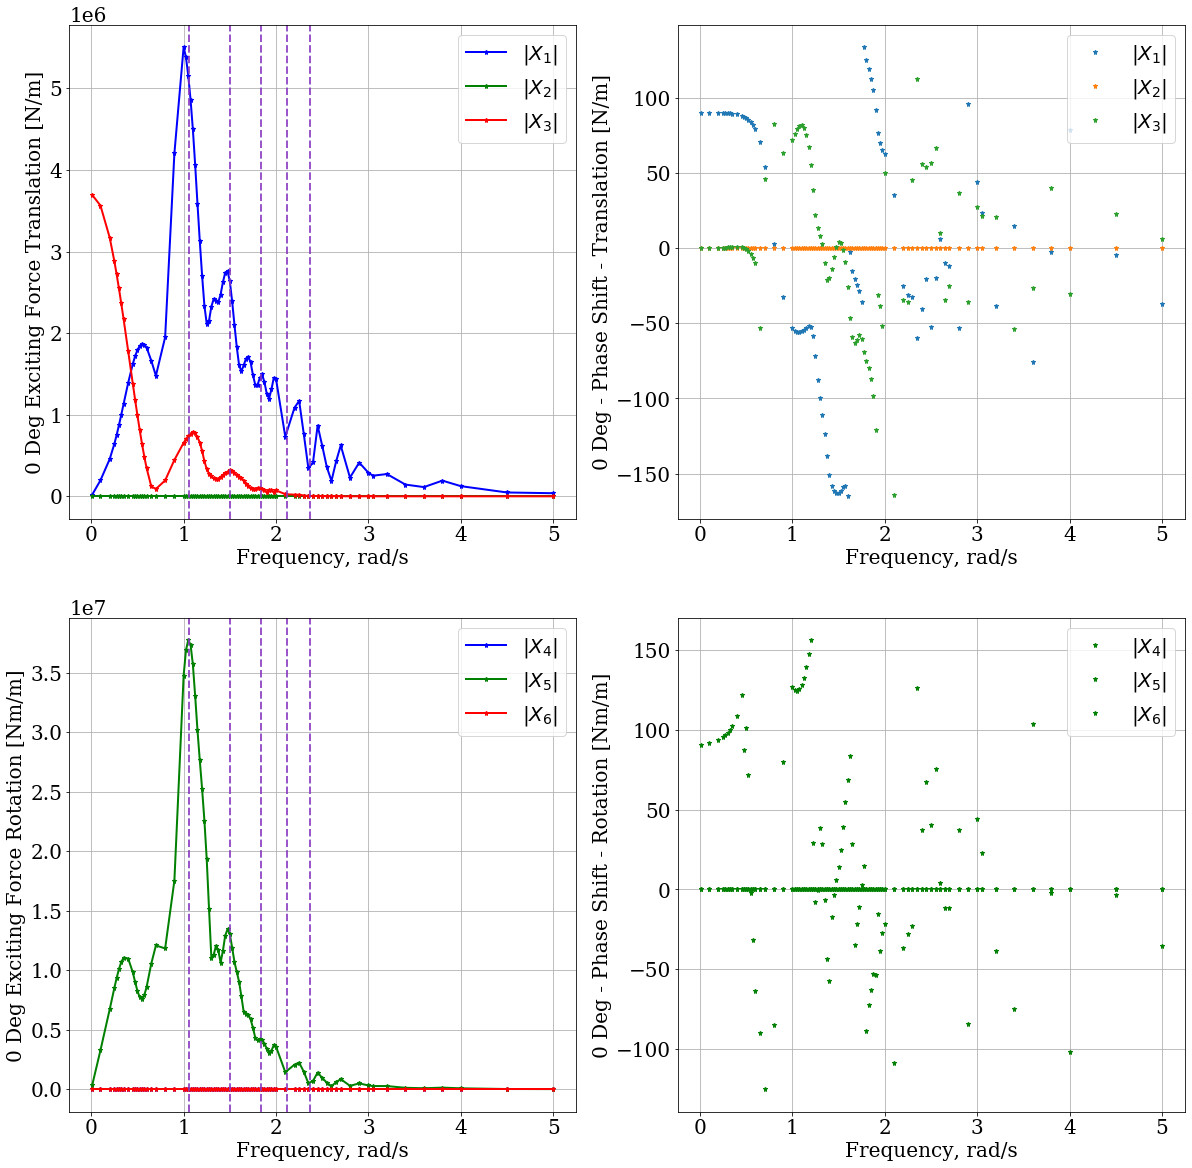

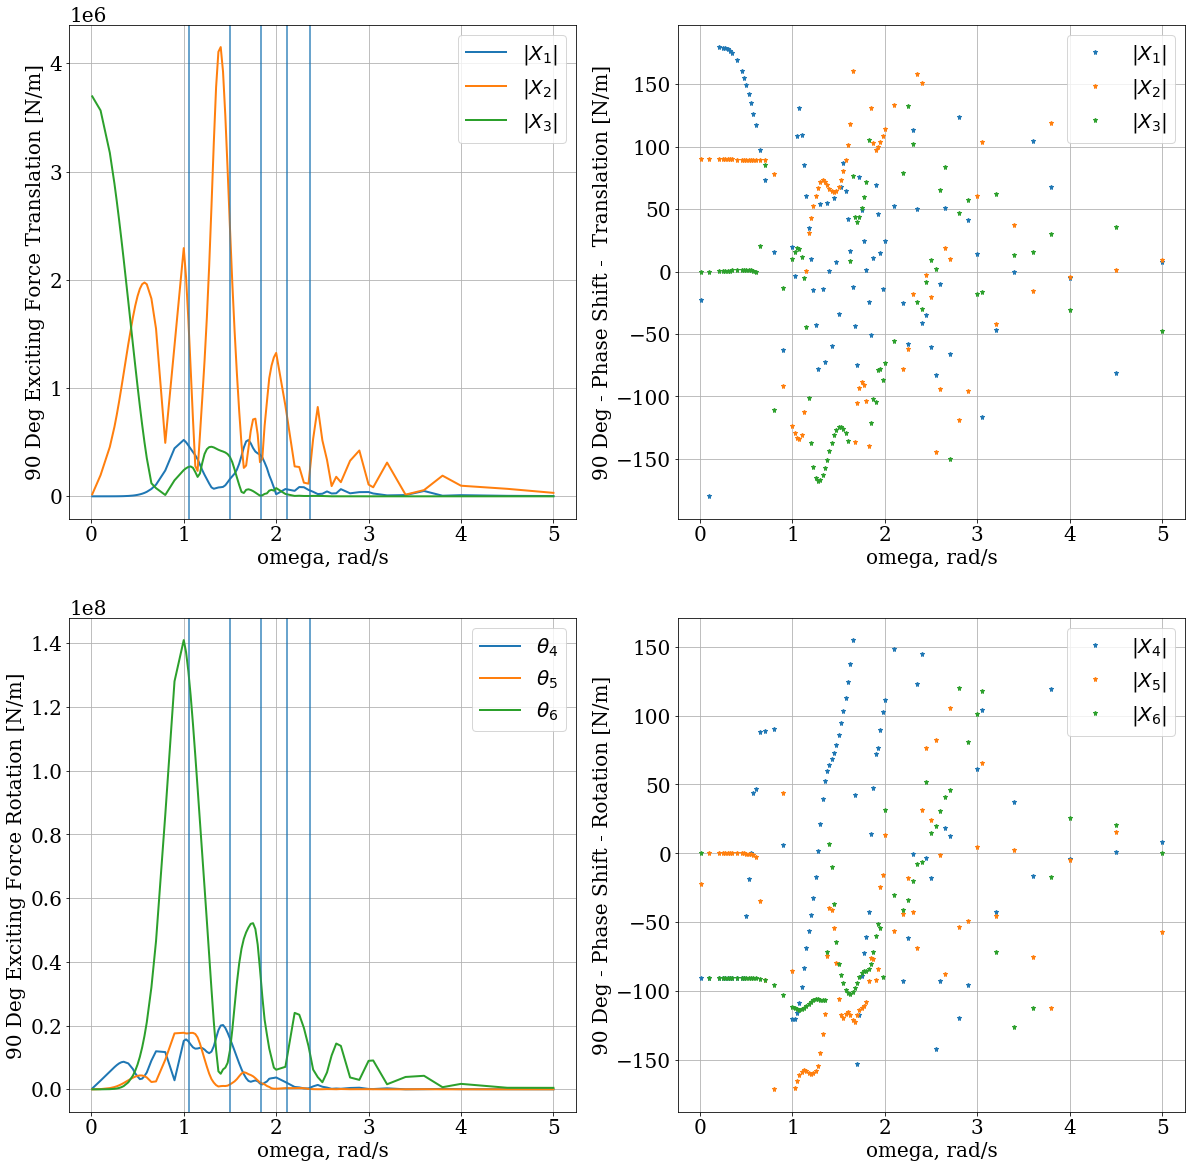

In [25]:
plot_hydroD_results(sim,mufp,env,1)

In [12]:
interp_inputs = np.array(
    [[np.floor(x_space / 10) * 10, np.floor(y_space / 10) * 10, np.floor(dia_column), np.floor(draft / 2) * 2],
     [np.ceil(x_space / 10) * 10, np.ceil(y_space / 10) * 10, np.ceil(dia_column), np.ceil(draft / 2) * 2],
     [np.floor(x_space / 10) * 10, np.floor(y_space / 10) * 10, np.floor(dia_column), np.floor(draft / 2) * 2],
     [np.ceil(x_space / 10) * 10, np.ceil(y_space / 10) * 10, np.ceil(dia_column), np.ceil(draft / 2) * 2]])

# Interpolating surrogate models to get estimate
design = [x_space, y_space, dia_column, draft]
results = []

for i in np.linspace(0, len(interp_inputs[:, 1]) - 1, len(interp_inputs)).astype(int):
    file_loc = r'E:\pickle_files'
    file_name = "\sim_x_%d_y_%d_D%d_dr%d" % (
        interp_inputs[i, 0], interp_inputs[i, 1], interp_inputs[i, 2], interp_inputs[i, 3])
    file_path = file_loc + file_name
    infile = open(file_path, 'rb')
    results.append(pickle.load(infile))
    infile.close()

linear = Interpolate2d(results, interp_inputs, design, [0, 1])


In [16]:
    plt.rcParams.update({'font.size': 20})
    plt.rcParams["figure.figsize"] = (20, 20)
    styles = [['-*b', '-*g', '-*r', '-*m', '-*g', '-*r'],
              ['--b', '--g', '--r', '--b', '--g', '--r'],
              [':b', ':g', ':r', ':b', ':g', ':r'],
              ['-b', '-g', '-r', '-b', '-g', '-r'],
              ['--b', '--g', '--r', '--b', '--g', '--r'],
              [':b', ':g', ':r', ':b', ':g', ':r']]

    legend_A = [['A11', 'A12', 'A13', 'A14', 'A15', 'A16'],
                ['A21', 'A22', 'A23', 'A24', 'A25', 'A26'],
                ['A31', 'A32', 'A33', 'A34', 'A35', 'A36'],
                ['A41', 'A42', 'A43', 'A44', 'A45', 'A46'],
                ['A51', 'A52', 'A53', 'A54', 'A55', 'A56'],
                ['A61', 'A62', 'A63', 'A64', 'A65', 'A66']]

    legend_D = [['D11', 'D12', 'D13', 'D14', 'D15', 'D16'],
                ['D21', 'D22', 'D23', 'D24', 'D25', 'D26'],
                ['D31', 'D32', 'D33', 'D34', 'D35', 'D36'],
                ['D41', 'D42', 'D43', 'D44', 'D45', 'D46'],
                ['D51', 'D52', 'D53', 'D54', 'D55', 'D56'],
                ['D61', 'D62', 'D63', 'D64', 'D65', 'D66']]

    legend_F = ['|$X_1$|', '|$X_2$|', '|$X_3$|', '|$X_4$|', '|$X_5$|', '|$X_6$|']

    legend_T = [r'$\theta_1$', r'$\theta_2$', r'$\theta_3$', r'$\theta_4$', r'$\theta_5$', r'$\theta_6$']

In [ ]:
sim.WAVEEX.shape

In [ ]:
hydrod.WAVEEX.shape

Text(0.5, 1.0, 'Pitch')

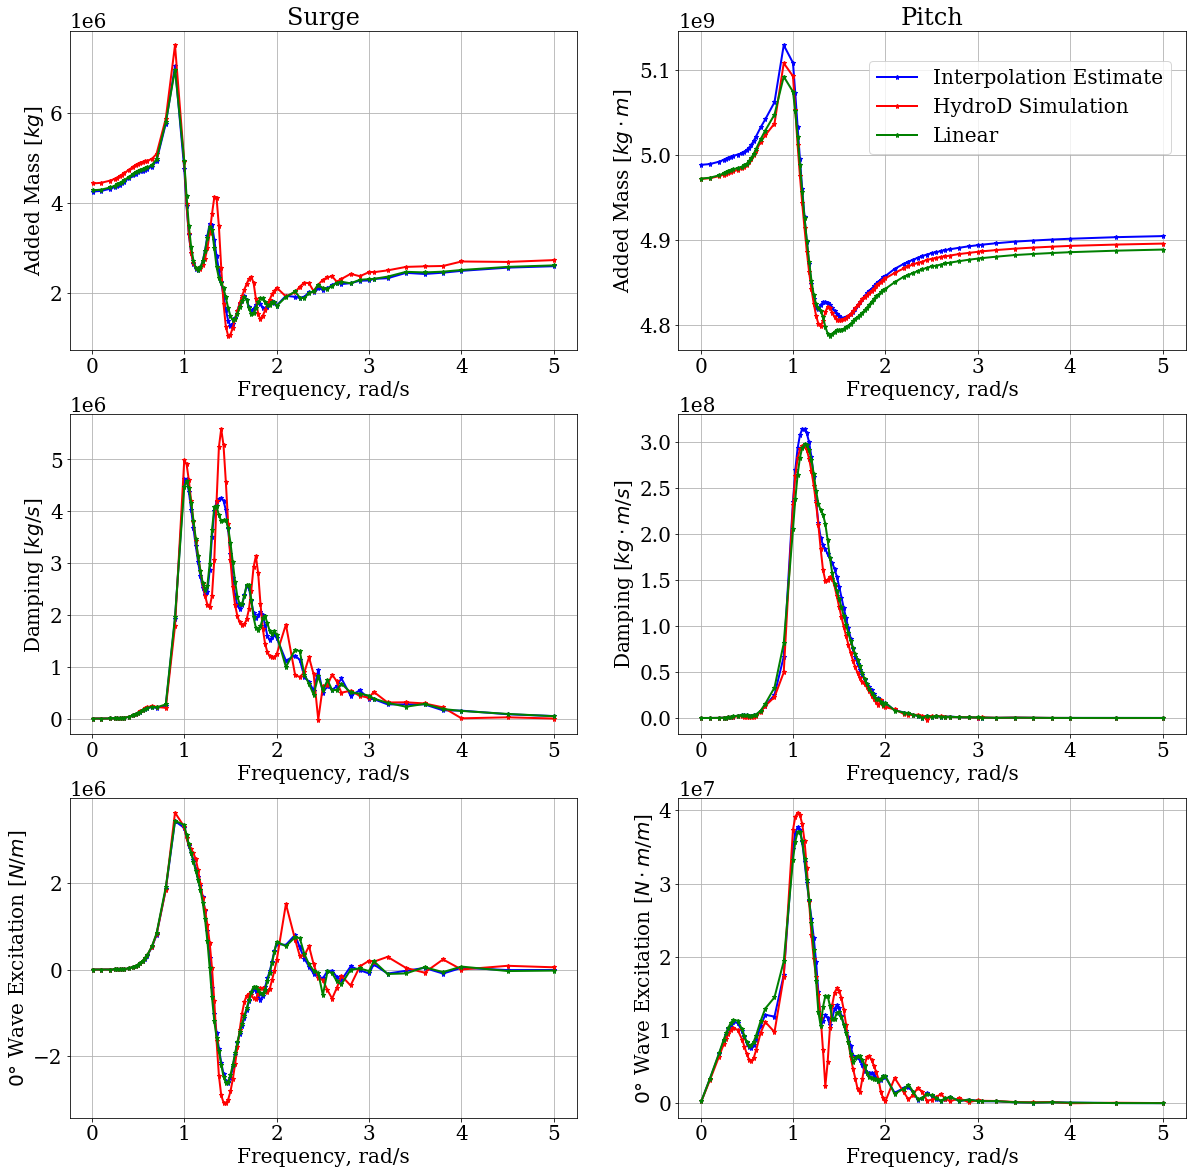

In [21]:
fig, axs1 = plt.subplots(3, 2)
axs1[0, 0].plot(sim.wave_disc[:, 4], sim.ADDEDMASS[:, 0, 0], styles[0][0],
               linewidth=2, markersize=5, label='Interpolated')
axs1[0, 0].plot(sim.wave_disc[:, 4], hydrod.ADDEDMASS[:, 0, 0], styles[0][2],
           linewidth=2, markersize=5, label="HydroD Simulation" )
axs1[0, 0].plot(sim.wave_disc[:, 4], linear.ADDEDMASS[:, 0, 0], styles[0][1],
           linewidth=2, markersize=5,  label="Linear")

axs1[0, 1].plot(sim.wave_disc[:, 4], sim.ADDEDMASS[:, 4, 4], styles[0][0],
               linewidth=2, markersize=5, label='Interpolated')
axs1[0, 1].plot(sim.wave_disc[:, 4], hydrod.ADDEDMASS[:, 4, 4], styles[0][2],
           linewidth=2, markersize=5, label="HydroD Simulation" ) 
axs1[0, 1].plot(sim.wave_disc[:, 4], linear.ADDEDMASS[:, 4, 4], styles[0][1],
           linewidth=2, markersize=5,  label="Linear") 


axs1[1, 0].plot(sim.wave_disc[:, 4], sim.DAMPING[:, 0, 0], styles[0][0],
               linewidth=2, markersize=5, label='Interpolated')
axs1[1, 0].plot(sim.wave_disc[:, 4], hydrod.DAMPING[:, 0, 0], styles[0][2],
           linewidth=2, markersize=5, label="HydroD Simulation" )
axs1[1, 0].plot(sim.wave_disc[:, 4], linear.DAMPING[:, 0, 0], styles[0][1],
           linewidth=2, markersize=5,  label="Linear")

axs1[1, 1].plot(sim.wave_disc[:, 4], sim.DAMPING[:, 4, 4], styles[0][0],
               linewidth=2, markersize=5, label='Interpolated')
axs1[1, 1].plot(sim.wave_disc[:, 4], hydrod.DAMPING[:, 4, 4], styles[0][2],
           linewidth=2, markersize=5, label="HydroD Simulation" ) 
axs1[1, 1].plot(sim.wave_disc[:, 4], linear.DAMPING[:, 4, 4], styles[0][1],
           linewidth=2, markersize=5,  label="Linear")

axs1[2, 0].plot(sim.wave_disc[:, 4], sim.WAVEEX[0, :, 0, 0], styles[0][0],
               linewidth=2, markersize=5, label='Interpolated')
axs1[2, 0].plot(sim.wave_disc[:, 4], hydrod.WAVEEX[0, :, 0, 0], styles[0][2],
           linewidth=2, markersize=5, label="HydroD Simulation" )
axs1[2, 0].plot(sim.wave_disc[:, 4], linear.WAVEEX[0, :, 0, 0], styles[0][1],
           linewidth=2, markersize=5,  label="Linear")

axs1[2, 1].plot(sim.wave_disc[:, 4], sim.WAVEEX[0, :, 4, 2], styles[0][0],
               linewidth=2, markersize=5, label='Interpolated')
axs1[2, 1].plot(sim.wave_disc[:, 4], hydrod.WAVEEX[0, :, 4, 2], styles[0][2],
           linewidth=2, markersize=5, label="HydroD Simulation" ) 
axs1[2, 1].plot(sim.wave_disc[:, 4], linear.WAVEEX[0, :, 4, 2], styles[0][1],
           linewidth=2, markersize=5, label="Linear")

plt.figlegend(['Interpolation Estimate', 'HydroD Simulation', 'Linear'], bbox_to_anchor=(.82, .78))

axs1[0, 0].ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
axs1[0, 1].ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
axs1[1, 0].ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
axs1[1, 1].ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
axs1[2, 0].ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
axs1[2, 1].ticklabel_format(axis="y", style="sci", scilimits=(0, 0))


axs1[0, 0].set(xlabel='Frequency, rad/s', ylabel='Added Mass [$kg$]')
axs1[0, 1].set(xlabel='Frequency, rad/s', ylabel='Added Mass [$kg \cdot m$]')


axs1[1, 0].set(xlabel='Frequency, rad/s', ylabel='Damping [$kg/s$]')
axs1[1, 1].set(xlabel='Frequency, rad/s', ylabel='Damping [$kg \cdot m/s$]')


axs1[2, 0].set(xlabel='Frequency, rad/s', ylabel='$0 \degree$ Wave Excitation [$N/m$]')
axs1[2, 1].set(xlabel='Frequency, rad/s', ylabel='$0 \degree$ Wave Excitation [$N \cdot m/m$]')
axs1[2, 1].grid(b=True, which='both', axis='both')


axs1[0,0].set_title('Surge')
axs1[0,1].set_title('Pitch')


In [ ]:
fig, axs1 = plt.subplots(3, 2)
axs1[2, 0].plot(sim.wave_disc[:, 4], sim.WAVEEX[1, :, 0, 0], styles[0][0],
               linewidth=2, markersize=5, label='Interpolated')
axs1[2, 0].plot(sim.wave_disc[:, 4], hydrod.WAVEEX[1, :, 0, 0], styles[0][2],
           linewidth=2, markersize=5, label="HydroD Simulation" )
axs1[2, 0].plot(sim.wave_disc[:, 4], linear.WAVEEX[1, :, 0, 0], styles[0][1],
           linewidth=2, markersize=5,  label="Linear")

axs1[2, 1].plot(sim.wave_disc[:, 4], sim.WAVEEX[1, :, 1, 1], styles[0][0],
               linewidth=2, markersize=5, label='Interpolated')
axs1[2, 1].plot(sim.wave_disc[:, 4], hydrod.WAVEEX[1, :, 1, 1], styles[0][2],
           linewidth=2, markersize=5, label="HydroD Simulation" ) 
axs1[2, 1].plot(sim.wave_disc[:, 4], linear.WAVEEX[1, :, 1, 1], styles[0][1],
           linewidth=2, markersize=5, label="Linear")

axs1[2, 1].plot(sim.wave_disc[:, 4], sim.WAVEEX[1, :, 4, 2], styles[0][0],
               linewidth=2, markersize=5, label='Interpolated')
axs1[2, 1].plot(sim.wave_disc[:, 4], hydrod.WAVEEX[1, :, 4, 2], styles[0][2],
           linewidth=2, markersize=5, label="HydroD Simulation" ) 
axs1[2, 1].plot(sim.wave_disc[:, 4], linear.WAVEEX[1, :, 4, 2], styles[0][1],
           linewidth=2, markersize=5, label="Linear")

axs1[2, 1].plot(sim.wave_disc[:, 4], sim.WAVEEX[1, :, 4, 2], styles[0][0],
               linewidth=2, markersize=5, label='Interpolated')
axs1[2, 1].plot(sim.wave_disc[:, 4], hydrod.WAVEEX[1, :, 4, 2], styles[0][2],
           linewidth=2, markersize=5, label="HydroD Simulation" ) 
axs1[2, 1].plot(sim.wave_disc[:, 4], linear.WAVEEX[1, :, 4, 2], styles[0][1],
           linewidth=2, markersize=5, label="Linear"))

axs1[2, 1].plot(sim.wave_disc[:, 4], sim.WAVEEX[1, :, 4, 2], styles[0][0],
               linewidth=2, markersize=5, label='Interpolated')
axs1[2, 1].plot(sim.wave_disc[:, 4], hydrod.WAVEEX[1, :, 4, 2], styles[0][2],
           linewidth=2, markersize=5, label="HydroD Simulation" ) 
axs1[2, 1].plot(sim.wave_disc[:, 4], linear.WAVEEX[1, :, 4, 2], styles[0][1],
           linewidth=2, markersize=5, label="Linear")

axs1[2, 1].plot(sim.wave_disc[:, 4], sim.WAVEEX[1, :, 4, 2], styles[0][0],
               linewidth=2, markersize=5, label='Interpolated')
axs1[2, 1].plot(sim.wave_disc[:, 4], hydrod.WAVEEX[1, :, 4, 2], styles[0][2],
           linewidth=2, markersize=5, label="HydroD Simulation" ) 
axs1[2, 1].plot(sim.wave_disc[:, 4], linear.WAVEEX[1, :, 4, 2], styles[0][1],
           linewidth=2, markersize=5, label="Linear")


plt.figlegend(['Interpolation Estimate', 'HydroD Simulation', 'Linear'], bbox_to_anchor=(.82, .78))

axs1[0, 0].ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
axs1[0, 1].ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
axs1[1, 0].ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
axs1[1, 1].ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
axs1[2, 0].ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
axs1[2, 1].ticklabel_format(axis="y", style="sci", scilimits=(0, 0))


axs1[0, 0].set(xlabel='Frequency, rad/s', ylabel='Added Mass [$kg$]')
axs1[0, 1].set(xlabel='Frequency, rad/s', ylabel='Added Mass [$kg \cdot m$]')


axs1[1, 0].set(xlabel='Frequency, rad/s', ylabel='Damping [$kg/s$]')
axs1[1, 1].set(xlabel='Frequency, rad/s', ylabel='Damping [$kg \cdot m/s$]')


axs1[2, 0].set(xlabel='Frequency, rad/s', ylabel='$0 \degree$ Wave Excitation [$N/m$]')
axs1[2, 1].set(xlabel='Frequency, rad/s', ylabel='$0 \degree$ Wave Excitation [$N \cdot m/m$]')
axs1[2, 1].grid(b=True, which='both', axis='both')


axs1[0,0].set_title('Surge')
axs1[0,1].set_title('Pitch')


In [ ]:
fig, axs1 = plt.subplots(2, 2)
axs1[0, 0].plot(interp_func1.wave_disc[:, 4], interp_func1.ADDEDMASS[:, 0, 0], styles[0][0],
               linewidth=2, markersize=5, label='Interpolated')
#axs1[0, 0].plot(interp_func1.wave_disc[:, 4], results[0].ADDEDMASS[:, 0, 0], styles[0][1],
#       linewidth=2, markersize=5, label="$x_c$=%d $y_c$=%d $D$=%d $Dr$=%d" % (interp_inputs[0,0],interp_inputs[0,1],interp_inputs[0,2],interp_inputs[0,3]))     
#axs1[0, 0].plot(interp_func1.wave_disc[:, 4], results[1].ADDEDMASS[:, 0, 0], styles[0][2],
#       linewidth=2, markersize=5, label="$x_c$=%d $y_c$=%d $D$=%d $Dr$=%d" % (interp_inputs[1,0],interp_inputs[1,1],interp_inputs[1,2],interp_inputs[1,3]))  
axs1[0, 0].plot(interp_func1.wave_disc[:, 4], results[2].ADDEDMASS[:, 0, 0], styles[0][2],
           linewidth=2, markersize=5, label="HydroD Simulation" )

axs1[0, 1].plot(interp_func1.wave_disc[:, 4], interp_func1.DAMPING[:, 0, 0], styles[0][0],
               linewidth=2, markersize=5, label='Interpolated')
axs1[0, 1].plot(interp_func1.wave_disc[:, 4], results[0].DAMPING[:, 0, 0], styles[0][1],
       linewidth=2, markersize=5, label="$x_c$=%d $y_c$=%d $D$%d $Dr$%d" % (interp_inputs[0,0],interp_inputs[0,1],interp_inputs[0,2],interp_inputs[0,3]))     
axs1[0, 1].plot(interp_func1.wave_disc[:, 4], results[1].DAMPING[:, 0, 0], styles[0][2],
       linewidth=2, markersize=5, label="$x_c$=%d $y_c$=%d $D$=%d $Dr$=%d" % (interp_inputs[1,0],interp_inputs[1,1],interp_inputs[1,2],interp_inputs[1,3]))  
axs1[0, 1].plot(interp_func1.wave_disc[:, 4], results[2].DAMPING[:, 0, 0], styles[0][3],
           linewidth=2, markersize=5, label="$x_c$=%d $y_c$=%d $D$%d $Dr$%d" % (interp_inputs[2,0],interp_inputs[2,1],interp_inputs[2,2],interp_inputs[2,3]))  




axs1[0, 0].ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
axs1[0, 1].ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
axs1[0, 0].legend(loc="upper right")
axs1[0, 0].set(xlabel='Frequency, rad/s', ylabel='Added Mass [kg]')
axs1[0, 1].set(xlabel='Frequency, rad/s', ylabel='Damping [kg/s]')
axs1[1, 0].set(xlabel='Frequency, rad/s', ylabel='Wave Excitation [N/m]')
axs1[1, 1].set(xlabel='Frequency, rad/s', ylabel='Added Mass [kg]')
axs1[0, 0].grid(b=True, which='both', axis='both')


In [ ]:


    for ii in np.linspace(3, 5, 3).astype(int):
        for jj in np.linspace(0, 2, 3).astype(int):
            axs1[1, 0].plot(results.wave_disc[:, 4], results.ADDEDMASS[:, ii, jj], styles[ii][jj], label=legend_A[ii][jj],
                           linewidth=2, markersize=5)
    if plot_sync == 1:
        for xc in omega_x:
            axs1[1, 0].axvline(x=xc, linestyle='--', alpha=alpha_plot, linewidth=2, color='c')
        for xx in omega_y:
            axs1[1, 0].axvline(x=xx, color='m', linestyle='--', alpha=alpha_plot, linewidth=2)
    axs1[1, 0].ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    axs1[1, 0].legend(loc="upper right")
    axs1[1, 0].set(xlabel='Frequency, rad/s', ylabel='Added Mass [kg-m^2]')
    axs1[1, 0].grid(b=True, which='both', axis='both')

    for ii in np.linspace(0, 2, 3).astype(int):
        for jj in np.linspace(3, 5, 3).astype(int):
            axs1[1, 1].plot(results.wave_disc[:, 4], results.ADDEDMASS[:, ii, jj], styles[ii][jj], label=legend_A[ii][jj],
                           linewidth=2, markersize=5)
    if plot_sync == 1:
        for xc in omega_x:
            axs1[1, 1].axvline(x=xc, linestyle='--', alpha=alpha_plot, linewidth=2, color='c')
        for xx in omega_y:
            axs1[1, 1].axvline(x=xx, color='m', linestyle='--', alpha=alpha_plot, linewidth=2)
    axs1[1, 1].ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    axs1[1, 1].legend(loc="upper right")
    axs1[1, 1].set(xlabel='Frequency, rad/s', ylabel='Added Mass [kg-m]')
    axs1[1, 1].grid(b=True, which='both', axis='both')

    for ii in np.linspace(3, 5, 3).astype(int):
        for jj in np.linspace(3, 5, 3).astype(int):
            axs1[0, 1].plot(results.wave_disc[:, 4], results.ADDEDMASS[:, ii, jj], styles[ii][jj], label=legend_A[ii][jj],
                           linewidth=2, markersize=5)
    if plot_sync == 1:
        for xc in omega_x:
            axs1[0, 1].axvline(x=xc, linestyle='--', alpha=alpha_plot, linewidth=2, color='c')
        for xx in omega_y:
            axs1[0, 1].axvline(x=xx, color='m', linestyle='--', alpha=alpha_plot, linewidth=2)
    axs1[0, 1].ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    axs1[0, 1].legend(loc="upper right")
    axs1[0, 1].set(xlabel='Frequency, rad/s', ylabel='Added Mass [kg-m]')
    axs1[0, 1].grid(b=True, which='both', axis='both')